**COVID-19 Data Downloader Function**


Please bear in mind that if you are gonna use this piece of function/code you should have managed to validate your kaggle account to have intenet access, unless you have managed to run it on your personal Desktop with an internet connection.
In case you are not familiar, two related forums of kaggle internet connection are as follows.

https://www.kaggle.com/product-feedback/63544

https://www.kaggle.com/product-feedback/113350#652385


To use the function, you should simply enter an optional argument of the data subset you are looking for. This subset can be any of the 5 following: 'CONFIRMED', 'DEATH', 'RECOVERED', 'CONFIRMED_US', and 'DEATH_US'. Where first three subsets are the coronavirus related cases globally and the last two ones are the US cases, respectively. If none or a wrong value is chosen as the subset name, the globally confirmed cases is returned. The function will return a pandas DataFrame as an output. The returned dataset is the [COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data) dataset/subset from John Hopkins university

Hope you enjoy!

In [18]:
import requests
import numpy as np
import pandas as pd
import io

BASE_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
CONFIRMED = 'time_series_covid19_confirmed_global.csv'
DEATH = 'time_series_covid19_deaths_global.csv'
RECOVERED = 'time_series_covid19_recovered_global.csv'
CONFIRMED_US = 'time_series_covid19_confirmed_US.csv'
DEATH_US = 'time_series_covid19_deaths_US.csv'

def get_covid_data(subset = 'CONFIRMED'):
    """This function returns the latest available data subset of COVID-19. 
        The returned value is in pandas DataFrame type.
    Args:
        subset (:obj:`str`, optional): Any value out of 5 subsets of 'CONFIRMED',
        'DEATH', 'RECOVERED', 'CONFIRMED_US' and 'DEATH_US' is a valid input. If the value
        is not chosen or typed wrongly, CONFIRMED subet will be returned.
    """    

    if subset.upper() == 'DEATH':
        CSV_URL = BASE_URL + DEATH
    elif subset.upper() == 'RECOVERED':
        CSV_URL = BASE_URL + RECOVERED        
    elif subset.upper() == 'CONFIRMED_US':
        CSV_URL = BASE_URL + CONFIRMED_US        
    elif subset.upper() == 'DEATH_US':
        CSV_URL = BASE_URL + DEATH_US        
    else:
        CSV_URL = BASE_URL + CONFIRMED

    with requests.Session() as s:
        download = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        data = pd.read_csv(io.StringIO(decoded_content))

    return data

By running the first block, the function is ready to be used at any part of your code.

As a sample, here the globally death cases of coronavirus are presented.

In [19]:
death = get_covid_data(subset = 'DEATH')

print(death.head(10))

                 Province/State       Country/Region      Lat      Long  \
0                           NaN          Afghanistan  33.0000   65.0000   
1                           NaN              Albania  41.1533   20.1683   
2                           NaN              Algeria  28.0339    1.6596   
3                           NaN              Andorra  42.5063    1.5218   
4                           NaN               Angola -11.2027   17.8739   
5                           NaN  Antigua and Barbuda  17.0608  -61.7964   
6                           NaN            Argentina -38.4161  -63.6167   
7                           NaN              Armenia  40.0691   45.0382   
8  Australian Capital Territory            Australia -35.4735  149.0124   
9               New South Wales            Australia -33.8688  151.2093   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/31/20  4/1/20  \
0        0        0        0        0        0        0  ...        4       4   
1        0  

Sample Plot of the Data

Text(0, 0.5, 'Number of Cases')

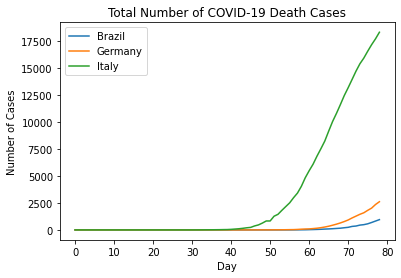

In [20]:
from matplotlib import pyplot

countries=['Brazil', 'Italy', 'Germany']

for r in death['Country/Region']:
    if r in countries:
        pyplot.plot(range(len(death.columns)-4), death.loc[death['Country/Region']==r].iloc[0,4:], label = r) 
pyplot.legend()
pyplot.title('Total Number of COVID-19 Death Cases')
pyplot.xlabel('Day')
pyplot.ylabel('Number of Cases')